In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import seaborn as sns
import scipy
!pip install pycountry_convert
import pycountry_convert as pc

In [2]:
path = r'/Users/cameronpaschall/Desktop/Project 6 Alt'

In [3]:
# Import covid prepared data set
df_cov = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Covid Wrangled.csv'), index_col = False)

In [4]:
df_cov.head()

,Unnamed: 0,Code,Country,Date,Total_Cases,Total_Deaths,Stringency_Index,Population,Gdp_Per_Capita,Human_Dev_Index
0,0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498
1,1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498
2,2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498
3,3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498
4,4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498


In [5]:
## Drop Unnamed Column
df_cov = df_cov.drop(columns = ['Unnamed: 0'])

In [6]:
df_cov.head()

,Code,Country,Date,Total_Cases,Total_Deaths,Stringency_Index,Population,Gdp_Per_Capita,Human_Dev_Index
0,AFG,Afghanistan,2019-12-31,0.0,0.0,0.0,38928341,1803.987,0.498
1,AFG,Afghanistan,2020-01-01,0.0,0.0,0.0,38928341,1803.987,0.498
2,AFG,Afghanistan,2020-01-02,0.0,0.0,0.0,38928341,1803.987,0.498
3,AFG,Afghanistan,2020-01-03,0.0,0.0,0.0,38928341,1803.987,0.498
4,AFG,Afghanistan,2020-01-04,0.0,0.0,0.0,38928341,1803.987,0.498


In [7]:
df_cov.describe()

,Total_Cases,Total_Deaths,Stringency_Index,Population,Gdp_Per_Capita,Human_Dev_Index
count,5.041800e+04,50418.000000,50418.000000,5.041800e+04,50418.000000,50418.000000
mean,6.215560e+04,2317.646555,48.224171,4.251601e+07,18460.095227,0.631553
std,3.922702e+05,12267.528868,32.151346,1.564607e+08,20348.222700,0.280450
min,0.000000e+00,0.000000,0.000000,8.090000e+02,0.000000,0.000000
25%,6.400000e+01,1.000000,17.590000,1.399491e+06,2851.153000,0.519000
50%,1.203000e+03,24.000000,54.630000,8.278737e+06,11713.895000,0.723000
75%,1.342225e+04,276.000000,76.390000,2.913681e+07,27936.896000,0.825000
max,8.154595e+06,219674.000000,100.000000,1.439324e+09,116935.600000,0.953000


## Create Correlation Matrix

In [8]:
df_cov.corr()

,Total_Cases,Total_Deaths,Stringency_Index,Population,Gdp_Per_Capita,Human_Dev_Index
Total_Cases,1.000000,0.911208,0.062395,0.291132,0.074796,0.093868
Total_Deaths,0.911208,1.000000,0.077111,0.237207,0.113118,0.132549
Stringency_Index,0.062395,0.077111,1.000000,0.083824,-0.020699,0.157166
Population,0.291132,0.237207,0.083824,1.000000,-0.038235,0.072850
Gdp_Per_Capita,0.074796,0.113118,-0.020699,-0.038235,1.000000,0.486213
Human_Dev_Index,0.093868,0.132549,0.157166,0.072850,0.486213,1.000000


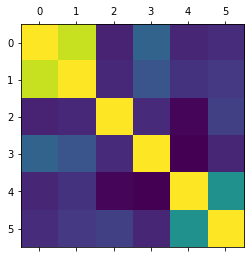

In [9]:
# Create a correlation heatmap using matplotlib

plt.matshow(df_cov.corr())
plt.show()

In [10]:
# Create a correlation heatmap using seaborn
df_cov.columns

Index(['Code', 'Country', 'Date', 'Total_Cases', 'Total_Deaths',
       'Stringency_Index', 'Population', 'Gdp_Per_Capita', 'Human_Dev_Index'],
      dtype='object')

In [11]:
## Create subset without date
df_sub = df_cov[['Population','Country', 'Gdp_Per_Capita', 'Human_Dev_Index', 'Total_Cases', 'Total_Deaths', 'Stringency_Index']]

In [12]:
df_sub

,Population,Country,Gdp_Per_Capita,Human_Dev_Index,Total_Cases,Total_Deaths,Stringency_Index
0,38928341,Afghanistan,1803.987,0.498,0.0,0.0,0.00
1,38928341,Afghanistan,1803.987,0.498,0.0,0.0,0.00
2,38928341,Afghanistan,1803.987,0.498,0.0,0.0,0.00
3,38928341,Afghanistan,1803.987,0.498,0.0,0.0,0.00
4,38928341,Afghanistan,1803.987,0.498,0.0,0.0,0.00
...,...,...,...,...,...,...,...
50413,14862927,Zimbabwe,1899.775,0.535,8055.0,231.0,76.85
50414,14862927,Zimbabwe,1899.775,0.535,8075.0,231.0,76.85
50415,14862927,Zimbabwe,1899.775,0.535,8099.0,231.0,76.85
50416,14862927,Zimbabwe,1899.775,0.535,8110.0,231.0,76.85


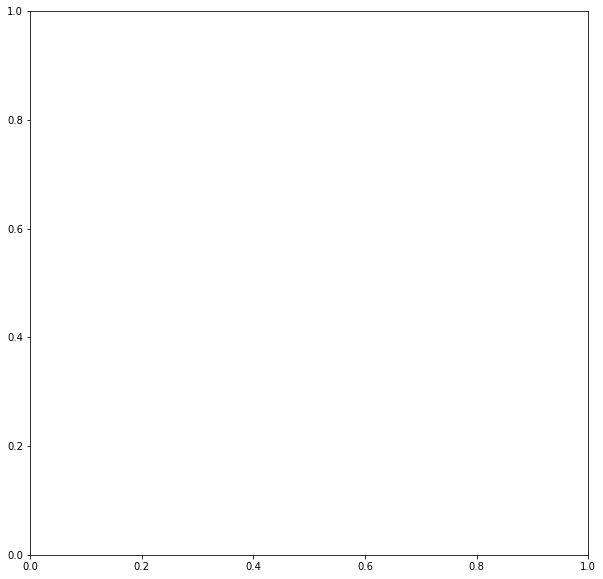

In [13]:
# Create a subplot with matplotlib.
f,ax = plt.subplots(figsize=(10,10))

In [14]:
# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.

corr = sns.heatmap(df_sub.corr(), annot = True, ax = ax) 

# The `annot` argument allows the plot to place the correlation coefficients onto the heatmap.

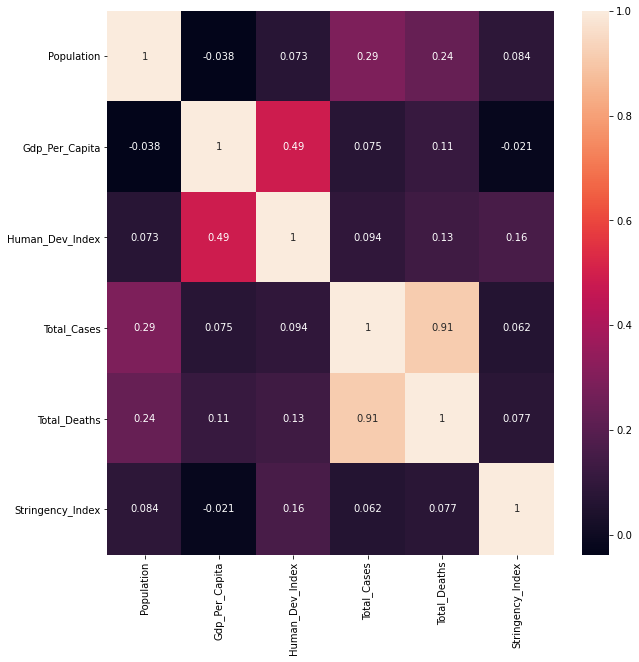

In [15]:
corr.figure

## Column Explanations-

Human Development Index- It is a measure of average achievement in key areas of human development. These could include healthcare facilities, medical advancements etc. Simply put, higher the HDI, better chances of citizens surviving a COVID-19 pandemic.

Stringency Index- Refers to how strict governments around the world became during the pandemic. Also refers to how stringent people became about following lockdown rules. In simpler words, it refers to how willing people were to following the rules of a pandemic.

GDP Per Capita- Represents the GDP per Capita offered by a country. GDP is the Gross Domestic Product. It refers to the sum of money that a particular state can use for the welfare of its citizens. GDP per Capita is the division of the GDP among the citizens. Higher the GDP per Capita, more the country is capable of handling pandemic level situations like COVID-19.

## Analysis-

As expected, the 2 factors with the highest correlation are total cases and total deaths(0.91). The more cases means more deaths.
Along this same vein, there is a moderate positive correlation between population and total cases and total deaths(0.24 and 0.29).

Although it's not a strong correlation, there is still a positive correlation between GDP and total deaths.
This is the same case with Human development index and total deaths.

The next strongest relationship is between human development index and gdp per capita with a coefficient of (0.49). This makes sense because if you have further human development, you are more likely to produce a higher GDP as a country.

The only negative correlation is between gdp per capita and stringency index

## Scatterplots

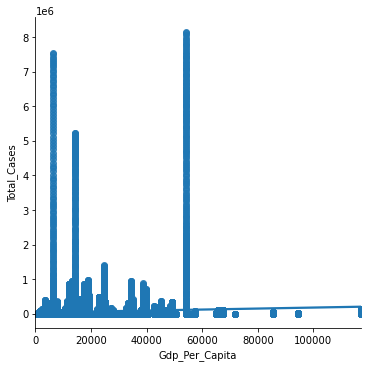

In [16]:
# Create a scatterplot for the "total cases" and "GDP" columns in seaborn

sns.lmplot(x = 'Gdp_Per_Capita', y = 'Total_Cases', data = df_cov)

## Analysis for gdp vs cases

It appears that the lower a country's GDP, the more cases that country will have.
There is obviously an outlier which i will explore further.

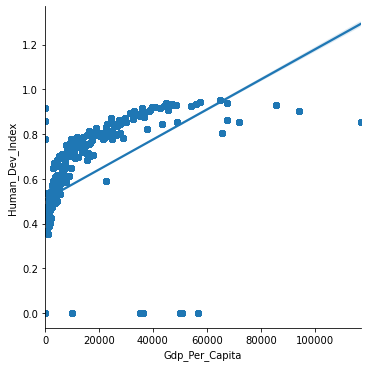

In [17]:
# Create a scatterplot for the "gdp_per_capita" and "Human_dev_index" columns in seaborn

sns.lmplot(x = 'Gdp_Per_Capita', y = 'Human_Dev_Index', data = df_cov)

## Analysis for GDP vs Human Dev Index

This is the most obvious relationship. The higher the GDP, the higher the Human Dev Index. This makes sense because if a country has more to spend on its population and infrastructure, the higher index score they'll have.

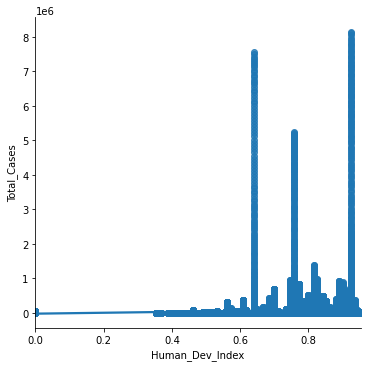

In [18]:
# Create a scatterplot for the "Human_dev_index" and "total cases" columns in seaborn

sns.lmplot(x = 'Human_Dev_Index', y = 'Total_Cases', data = df_cov)

## Analysis for Human dev index and total cases

It appears that if a country's human dev index is higher then they will have more cases.
Perhaps this is because the country's with the highest human dev index have the highest populations.
This is something to look further into.

## Pairplot

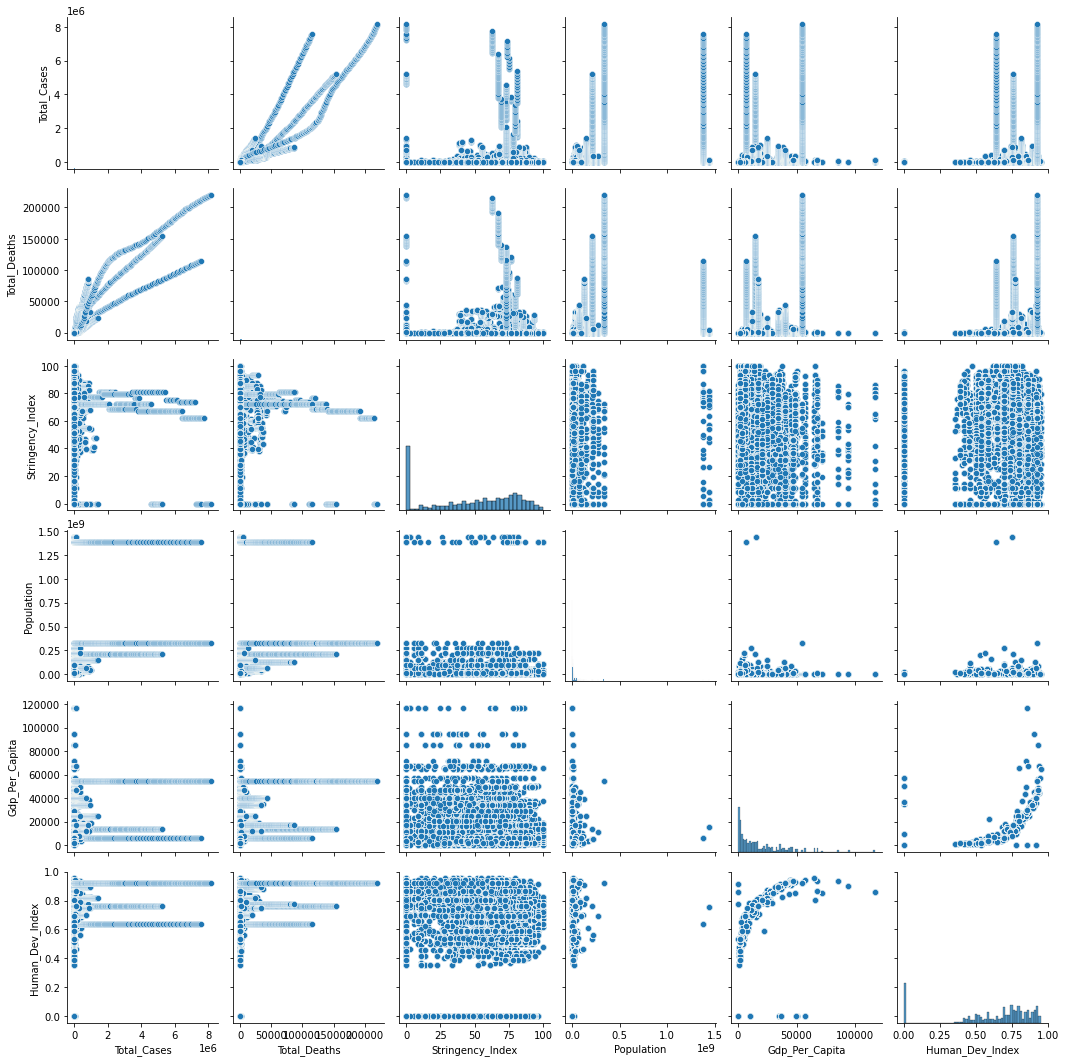

In [20]:
# Create a pair plot 

g = sns.pairplot(df_cov)

### Analysis of Pairplots

These Pairplots pretty much reiterate the same analysis i did on the above section.

## Categorical Plots

/Users/cameronpaschall/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Gdp_Per_Capita', ylabel='Density'>

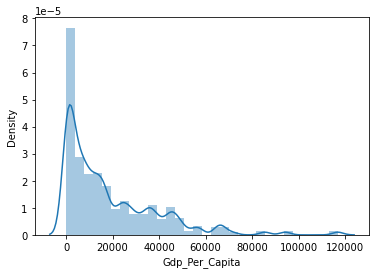

In [21]:
# Histogram of GDP Per Capita
sns.distplot(df_cov['Gdp_Per_Capita'], bins = 30)

In [29]:
# Create lower GDP category
df_cov.loc[df_cov['Gdp_Per_Capita'] < 40000, 'Gdp_category'] = 'Lower GDP'

In [31]:
# Create middle GDP category
df_cov.loc[(df_cov['Gdp_Per_Capita'] >= 40001) & (df_cov['Gdp_Per_Capita'] < 80000), 'Gdp_category'] = 'Middle GDP'

In [32]:
# Create Higher GDP category
df_cov.loc[df_cov['Gdp_Per_Capita'] > 80001, 'Gdp_category'] = 'Upper GDP'

In [33]:
# Get value counts of Gdp category
df_cov['Gdp_category'].value_counts(dropna = False)

Lower GDP     43095
Middle GDP     6221
Upper GDP       882
Name: Gdp_category, dtype: int64

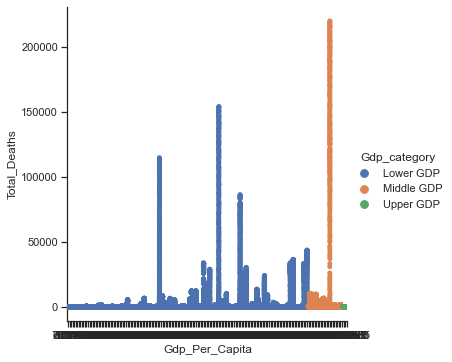

In [34]:
# Create categorical plot using Gdp_category and region
sns.set(style = 'ticks')
Cat_Gdp = sns.catplot(x = 'Gdp_Per_Capita', y = 'Total_Deaths', hue = 'Gdp_category', data = df_cov)

## Analysis of Cat plot

After viewing the categorical plot it shows that the countries with the highest GDP have the lowest number of deaths while the middle and lower GDP countries have the majority of the worlds deaths.

# Questions 

1. Which factors mostly account for a country's number of deaths?
- The obvious factors with the highest correlation coefficients are Population and Cases. The less obvious factors are human development index and GDP.

2. Does a country's GDP impact the number of Covid cases and deaths?
- There is in fact a positive coefficient when it comes to GDP and the number of cases and deaths. Countries with lower GDPs tend to have more cases with a few exceptions which I'm assuming are countries such as China or the US.

3. Does GDP per capita determine a country's human development index?
- There is in fact a moderately strong positive correlation between GDP and HDI. The higher the GDP the higher the human development index.

4. How is the human development index related to the number of cases of covid?
- It turns out that the higher the HDI is, the more cases a country has. This is probably due to the most developed countries having the most amount of people and therefore more of a chance for the population to become infected.

# EXTRA (testing something) Same Data but in Continent View

# Using installed country code converter to create "continent" column

In [23]:
df_cov = df_cov[df_cov.Country != 'Kosovo']

country = df_cov.Country.unique().tolist()
country_code = df_cov.Code.unique().tolist()
pop_world = df_cov.Population.unique().tolist()
hdi_world = []
gdp_world = []
cases_country = []
death_country = []
stringency_index = []

for i in country:
    hdi_world.append((df_cov.loc[df_cov.Country == i, 'Human_Dev_Index']).sum()/294)
    gdp_world.append(df_cov.loc[df_cov.Country == i, 'Gdp_Per_Capita'].sum()/294)
    stringency_index.append(df_cov.loc[df_cov.Country == i, 'Stringency_Index'].sum()/294)
    cases_country.append(df_cov.loc[(df_cov["Country"] == i), "Total_Cases"].sum())
    death_country.append(df_cov.loc[(df_cov["Country"] == i), "Total_Deaths"].sum())

In [24]:
alpha2_code = []
for i in country_code:
    alpha2_code.append(pc.country_alpha3_to_country_alpha2(i))
continent_code = []
for i in alpha2_code:
    try:
        continent_code.append(pc.country_alpha2_to_continent_code(i))
    except:
        continent_code.append('Unknown') 

data_agg = pd.DataFrame(list(zip(country_code, country, pop_world, cases_country, death_country, hdi_world, gdp_world, stringency_index, continent_code)), columns =['Code', 'Country', 'Population', 'Total_Cases', 'Total_Deaths', 'Human_Dev_Index', 'Gdp_Per_Capita','Stringency_Index', 'Continent']) 
data_agg = data_agg.replace({'AF':'Africa', 'AN':'Antarctica', 'AS':'Asia', 'EU':'Europe', 'NA':'North America', 'OC':'Oceania', 'SA':'South America'})
data_agg = data_agg.round(2)

data_agg.head()

,Code,Country,Population,Total_Cases,Total_Deaths,Human_Dev_Index,Gdp_Per_Capita,Stringency_Index,Continent
0,AFG,Afghanistan,38928341,5126433.0,165875.0,0.50,1803.99,46.80,Asia
1,ALB,Albania,2877800,1071951.0,31056.0,0.60,9033.24,48.63,Europe
2,DZA,Algeria,43851043,4893999.0,206429.0,0.75,13913.84,55.05,Africa
3,AND,Andorra,77265,223576.0,9850.0,0.66,0.00,31.29,Europe
4,AGO,Angola,32866268,304005.0,11820.0,0.42,4196.37,53.22,Africa


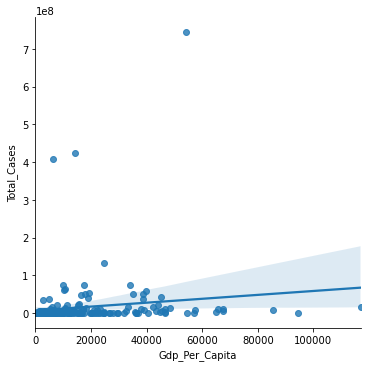

In [25]:
# Create a scatterplot for the "total deaths" and "total cases" columns in seaborn

sns.lmplot(x = 'Gdp_Per_Capita', y = 'Total_Cases', data = data_agg)

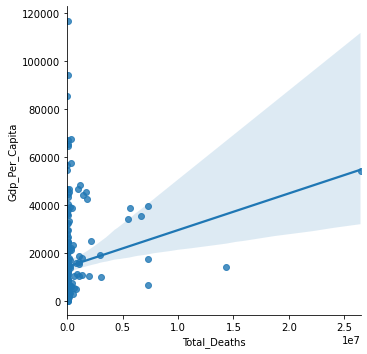

In [26]:
# Create a scatterplot for the "total deaths" and "total cases" columns in seaborn

sns.lmplot(x = 'Total_Deaths', y = 'Gdp_Per_Capita', data = data_agg)

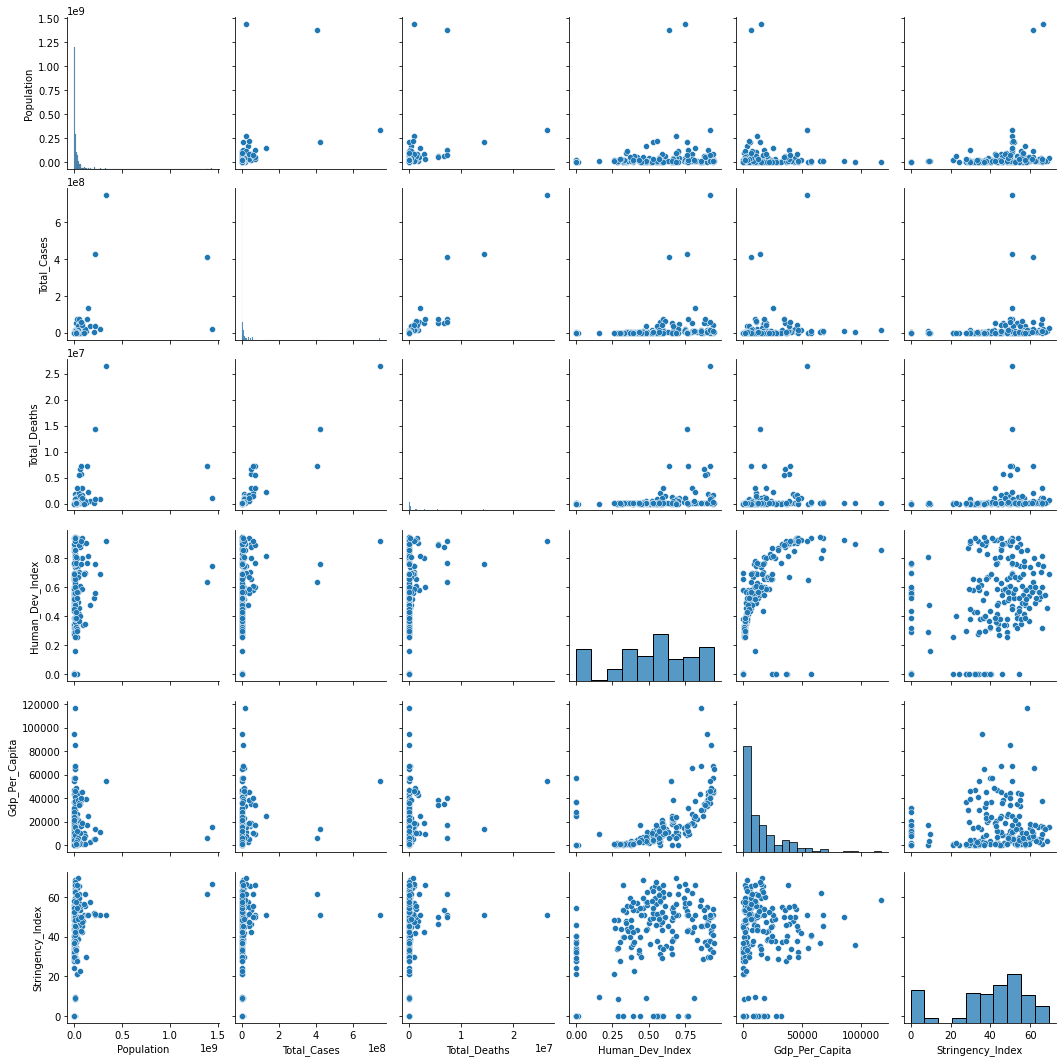

In [27]:
# Create a pair plot 

g = sns.pairplot(data_agg)